Soal 1. Deteksi Warna pada Citra

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('nmrifat.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [3]:
def sembunyikan_warna(hsv_img, original_img, lower_bound, upper_bound, warna='single'):
    if warna == 'double':  
        lower1, upper1, lower2, upper2 = lower_bound + upper_bound
        mask1 = cv2.inRange(hsv_img, lower1, upper1)
        mask2 = cv2.inRange(hsv_img, lower2, upper2)
        mask = cv2.bitwise_or(mask1, mask2)
    else:
        mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

    # Semua teks jadi abu-abu tua 
    gray = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
    gray_3ch = cv2.merge([gray, gray, gray])
    abu_tua = gray_3ch.copy()

    # Area dengan warna yang ingin disembunyikan jadi abu muda 
    abu_muda = abu_tua.copy()
    abu_muda[mask > 0] = [245, 245, 245]  
    abu_tua[mask > 0] = abu_muda[mask > 0]

    return abu_tua


In [4]:
def kontras_asli(image_rgb):
    #Memisahkan chanel warna
    r, g, b = cv2.split(image_rgb)

    #Mengaplikasikan clahe pada masing-masing warna
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    r = clahe.apply(r)
    g = clahe.apply(g)
    b = clahe.apply(b)

    #Menggabungkan kembali warna yang dikontras
    contrast_rgb = cv2.merge([r, g, b])
    return contrast_rgb


In [5]:
def plot_histogram(image, ax, title='Histogram'):
    image_flat = image.ravel()
    ax.hist(image_flat, bins=256, range=(0, 256), color='gray')
    ax.set_title(title)
    ax.set_xlim([0, 256])


In [6]:
hilang_biru = sembunyikan_warna(hsv, image_rgb,
                                np.array([100, 100, 100]),
                                np.array([140, 255, 255]),
                                warna='single')

hilang_merah = sembunyikan_warna(hsv, image_rgb,
                                 [np.array([0, 100, 100]), np.array([10, 255, 255])],
                                 [np.array([160, 100, 100]), np.array([180, 255, 255])],
                                 warna='double')

hilang_hijau = sembunyikan_warna(hsv, image_rgb,
                                 np.array([40, 100, 100]),
                                 np.array([80, 255, 255]),
                                 warna='single')

contrast_rgb_asli = kontras_asli(image_rgb)

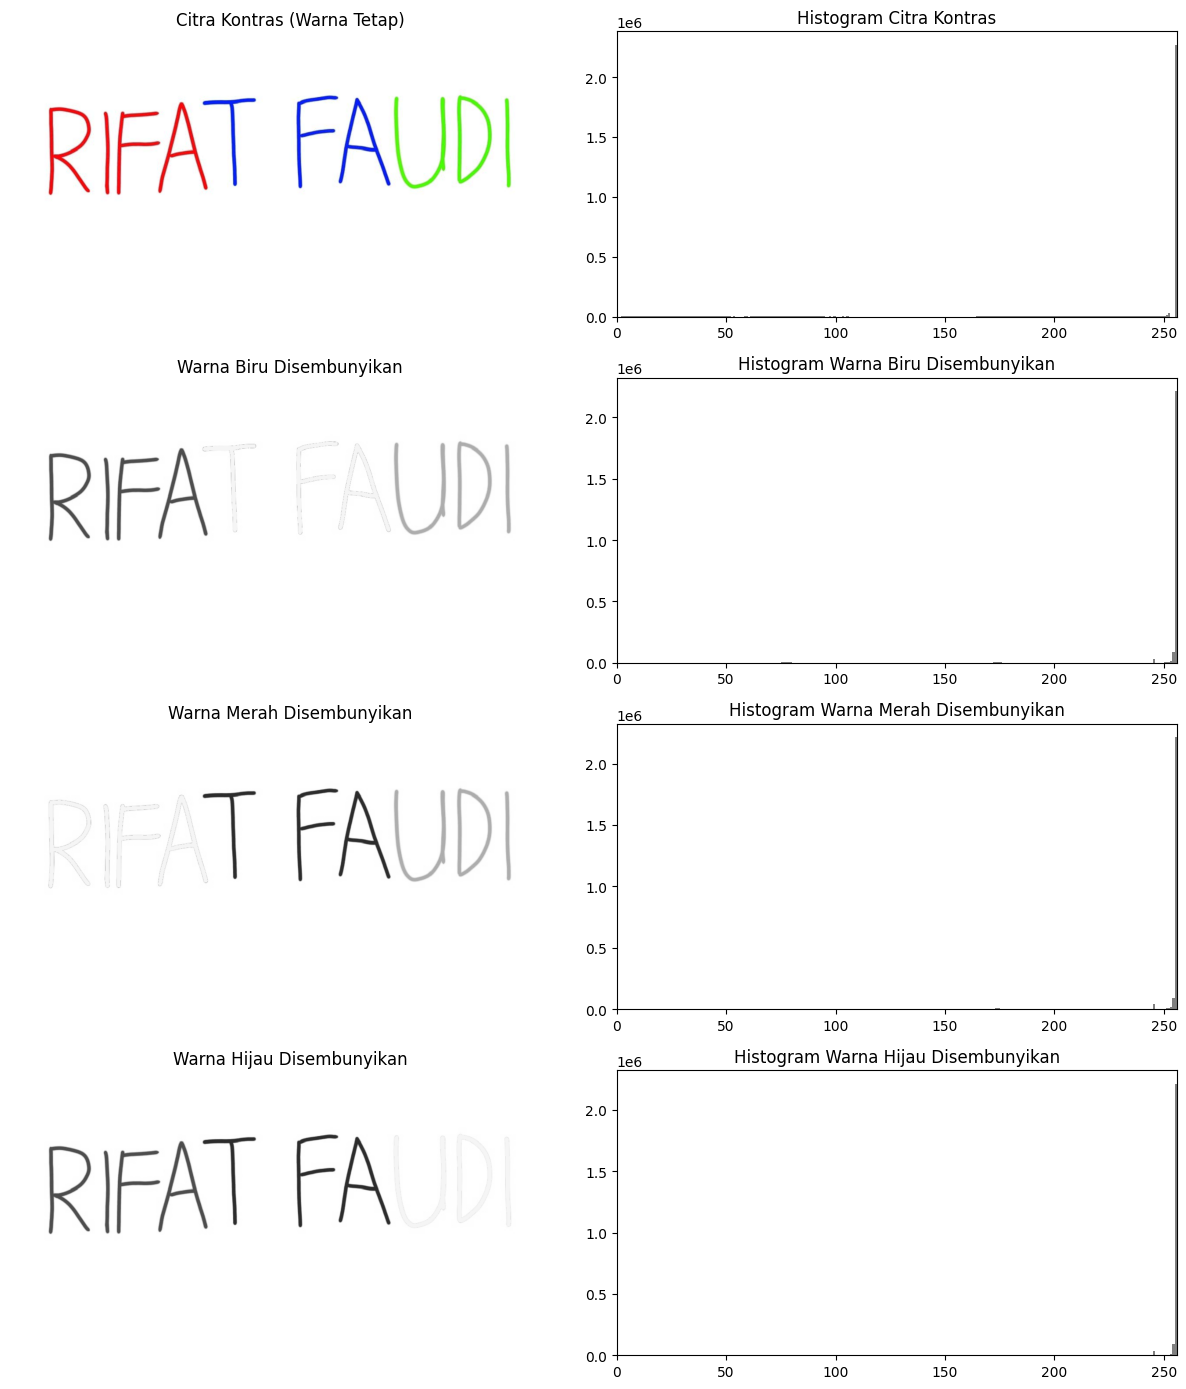

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(12, 14))

# 1. Citra kontras (warna tetap)
axs[0, 0].imshow(contrast_rgb_asli)
axs[0, 0].set_title("Citra Kontras (Warna Tetap)")
axs[0, 0].axis('off')
plot_histogram(contrast_rgb_asli, axs[0, 1], "Histogram Citra Kontras")

# 2. Warna biru disembunyikan
axs[1, 0].imshow(hilang_biru)
axs[1, 0].set_title("Warna Biru Disembunyikan")
axs[1, 0].axis('off')
plot_histogram(hilang_biru, axs[1, 1], "Histogram Warna Biru Disembunyikan")

# 3. Warna merah disembunyikan
axs[2, 0].imshow(hilang_merah)
axs[2, 0].set_title("Warna Merah Disembunyikan")
axs[2, 0].axis('off')
plot_histogram(hilang_merah, axs[2, 1], "Histogram Warna Merah Disembunyikan")

# 4. Warna hijau disembunyikan
axs[3, 0].imshow(hilang_hijau)
axs[3, 0].set_title("Warna Hijau Disembunyikan")
axs[3, 0].axis('off')
plot_histogram(hilang_hijau, axs[3, 1], "Histogram Warna Hijau Disembunyikan")

plt.tight_layout()
plt.show()

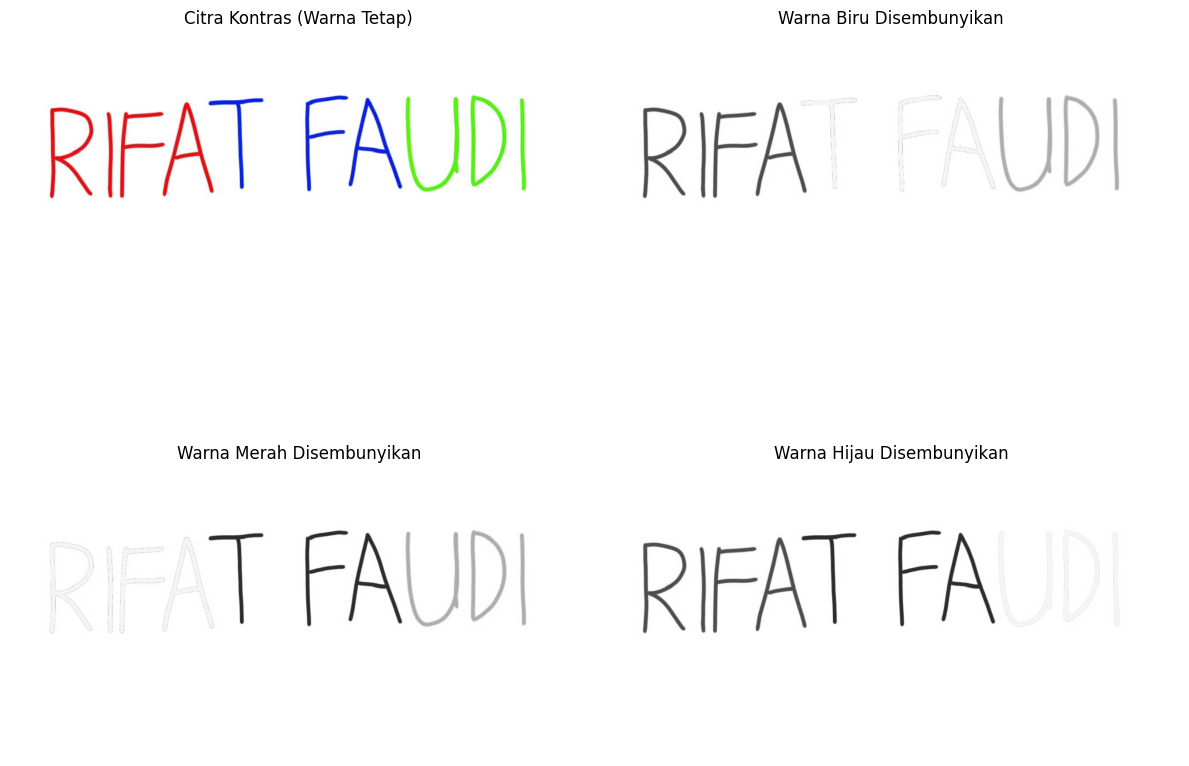

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Citra kontras (warna tetap)
axs[0, 0].imshow(contrast_rgb_asli)
axs[0, 0].set_title("Citra Kontras (Warna Tetap)")
axs[0, 0].axis('off')

# 2. Warna biru disembunyikan
axs[0, 1].imshow(hilang_biru)
axs[0, 1].set_title("Warna Biru Disembunyikan")
axs[0, 1].axis('off')

# 3. Warna merah disembunyikan
axs[1, 0].imshow(hilang_merah)
axs[1, 0].set_title("Warna Merah Disembunyikan")
axs[1, 0].axis('off')

# 4. Warna hijau disembunyikan
axs[1, 1].imshow(hilang_hijau)
axs[1, 1].set_title("Warna Hijau Disembunyikan")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

Soal 2. Urutan Ambang Batas Terkecil sampai Terbesar

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def hitung_statistik_rgb(gambar_rgb):
    r, g, b = gambar_rgb[:, :, 0], gambar_rgb[:, :, 1], gambar_rgb[:, :, 2]
    mean = np.mean([r, g, b], axis=(1, 2))
    std = np.std([r, g, b], axis=(1, 2))
    return mean, std

In [11]:
def threshold_otomatis(mean, std):
    return {
        'biru': int(abs(mean[2] - (mean[0] + mean[1]) / 2) + 1.5 * std[2]),
        'merah_biru': int(0.8 * (std[0] + std[2])),
        'rgb': int((max(std) + min(std)) * 0.5)
    }

In [12]:
def ambil_mask_hsv(hsv_img, warna):
    if warna == 'merah':
        lower1, upper1 = [0, 100, 100], [10, 255, 255]
        lower2, upper2 = [160, 100, 100], [180, 255, 255]
        mask1 = cv2.inRange(hsv_img, np.array(lower1), np.array(upper1))
        mask2 = cv2.inRange(hsv_img, np.array(lower2), np.array(upper2))
        return cv2.bitwise_or(mask1, mask2)
    elif warna == 'biru':
        return cv2.inRange(hsv_img, np.array([100, 100, 100]), np.array([140, 255, 255]))
    elif warna == 'hijau':
        return cv2.inRange(hsv_img, np.array([40, 100, 100]), np.array([80, 255, 255]))
    else:
        return np.zeros(hsv_img.shape[:2], dtype=np.uint8)

In [13]:
def tampilkan_mask(mask, gambar_asli, judul, ax):
    hasil = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)
    abu = cv2.cvtColor(hasil, cv2.COLOR_RGB2GRAY)
    _, biner = cv2.threshold(abu, 1, 255, cv2.THRESH_BINARY)
    ax.imshow(biner, cmap='gray')
    ax.set_title(judul)

In [14]:
gambar = cv2.imread('nmrifat.jpg')
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
gambar_hsv = cv2.cvtColor(gambar, cv2.COLOR_BGR2HSV)

In [15]:
mean_rgb, std_rgb = hitung_statistik_rgb(gambar_rgb)
ambang = threshold_otomatis(mean_rgb, std_rgb)

In [16]:
mask_none = np.zeros(gambar_rgb.shape[:2], dtype=np.uint8)
mask_biru = ambil_mask_hsv(gambar_hsv, 'biru')
mask_merah = ambil_mask_hsv(gambar_hsv, 'merah')
mask_hijau = ambil_mask_hsv(gambar_hsv, 'hijau')

mask_red_blue = cv2.bitwise_or(mask_biru, mask_merah)
mask_rgb = cv2.bitwise_or(mask_red_blue, mask_hijau)

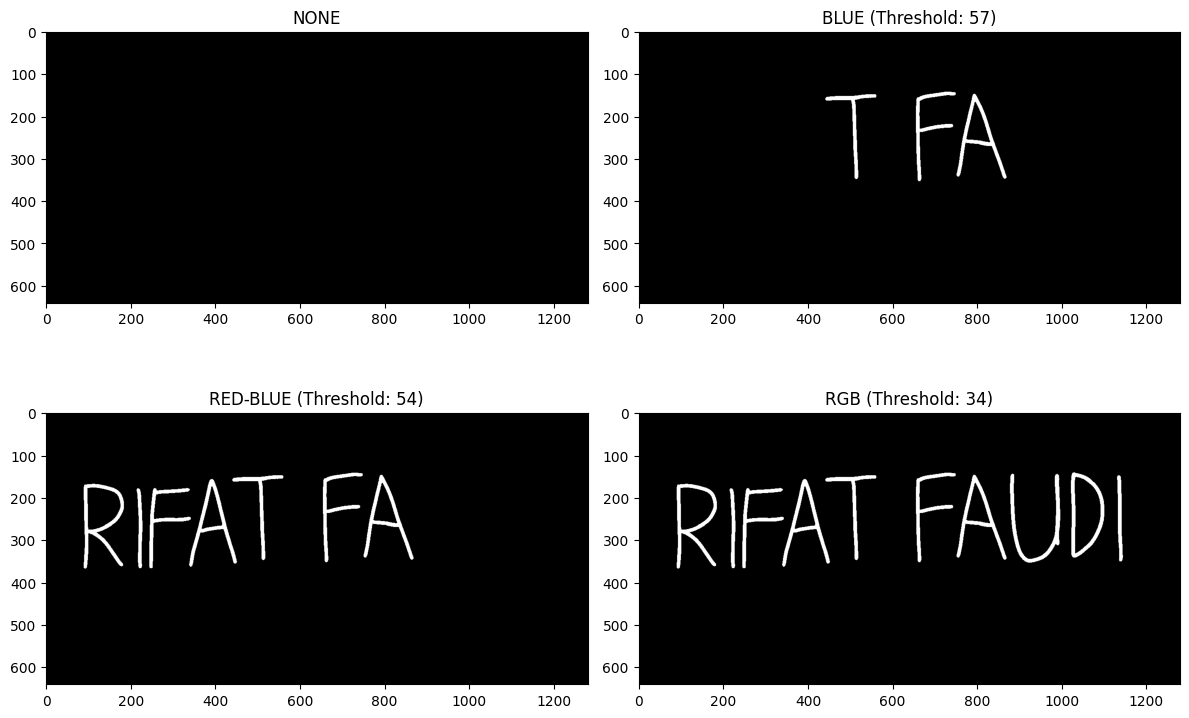

In [17]:
judul_list = ['NONE', f"BLUE (Threshold: {ambang['biru']})", f"RED-BLUE (Threshold: {ambang['merah_biru']})", f"RGB (Threshold: {ambang['rgb']})"]
mask_list = [mask_none, mask_biru, mask_red_blue, mask_rgb]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for ax, mask, judul in zip(axs.flat, mask_list, judul_list):
    tampilkan_mask(mask, gambar_rgb, judul, ax)

plt.tight_layout()
plt.show()

Soal 3. Memperbaiki Gambar Backlight

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def show_images(images, titles, cmap=None):
    plt.figure(figsize=(18,6))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap if cmap else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [20]:
image = cv2.imread('rifat.jpg')  
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [21]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [22]:
bright = cv2.convertScaleAbs(gray, alpha=1.0, beta=50)

In [23]:
contrast_only = cv2.convertScaleAbs(gray, alpha=1.5, beta=0)

In [24]:
bright_contrast = cv2.convertScaleAbs(bright, alpha=1.5, beta=0)

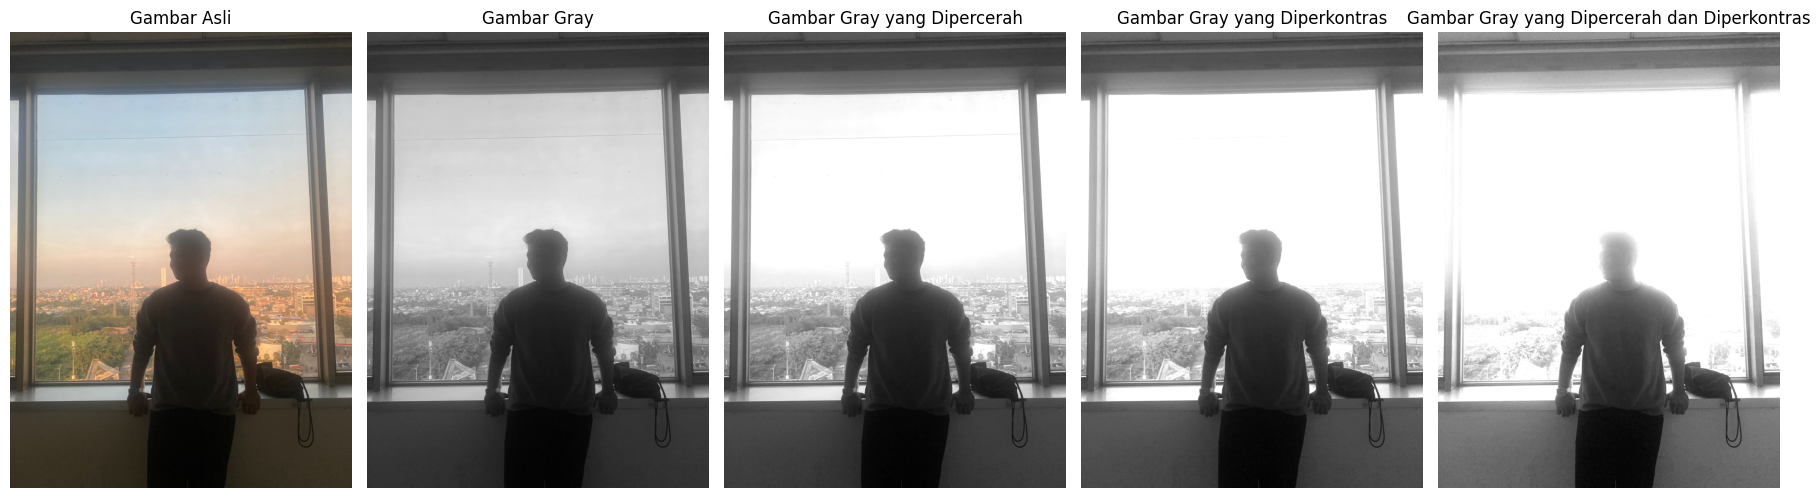

In [25]:
show_images(
    [image_rgb, gray, bright, contrast_only, bright_contrast],
    ["Gambar Asli", "Gambar Gray", "Gambar Gray yang Dipercerah", 
     "Gambar Gray yang Diperkontras", "Gambar Gray yang Dipercerah dan Diperkontras"],
    cmap='gray'
)

In [26]:
cv2.imwrite('output_gray.jpg', gray)
cv2.imwrite('output_bright.jpg', bright)
cv2.imwrite('output_contrast.jpg', contrast_only)
cv2.imwrite('output_bright_contrast.jpg', bright_contrast)

True